In [1]:
def AuAgAlloyDielectricModel(GMF):
    import numpy as np

    c = 2.99792458e17  # Speed of light in nm/s
    h = 4.135667516e-15  # Planck's constant in eV.s

    lambda_vals = np.arange(270, 1201)  # Wavelength range from 270 nm to 1200 nm
    omega = h * c / lambda_vals  # Angular frequency in eV

    # Model parameters
    ModelParameters = np.array([
        [8.9234, 8.5546, 9.0218],  # wp
        [0.042389, 0.022427, 0.16713],  # gammap
        [2.2715, 1.7381, 2.2838],  # einf
        [2.6652, 4.0575, 3.0209],  # wg1
        [2.3957, 3.9260, 2.7976],  # w01
        [0.17880, 0.017723, 0.18833],  # gamma1
        [73.251, 51.217, 22.996],  # A1
        [3.5362, 4.1655, 3.3400],  # w02
        [0.35467, 0.18819, 0.68309],  # gamma2
        [40.007, 30.770, 57.540],  # A2
    ])

    # Compute parameters
    wp = (
        GMF**2 * (2 * ModelParameters[0, 0] - 4 * ModelParameters[0, 2] + 2 * ModelParameters[0, 1])
        + GMF * (-ModelParameters[0, 0] + 4 * ModelParameters[0, 2] - 3 * ModelParameters[0, 1])
        + ModelParameters[0, 1]
    )

    gammap = (
        GMF**2 * (2 * ModelParameters[1, 0] - 4 * ModelParameters[1, 2] + 2 * ModelParameters[1, 1])
        + GMF * (-ModelParameters[1, 0] + 4 * ModelParameters[1, 2] - 3 * ModelParameters[1, 1])
        + ModelParameters[1, 1]
    )

    einf = (
        GMF**2 * (2 * ModelParameters[2, 0] - 4 * ModelParameters[2, 2] + 2 * ModelParameters[2, 1])
        + GMF * (-ModelParameters[2, 0] + 4 * ModelParameters[2, 2] - 3 * ModelParameters[2, 1])
        + ModelParameters[2, 1]
    )

    wg1 = (
        GMF**2 * (2 * ModelParameters[3, 0] - 4 * ModelParameters[3, 2] + 2 * ModelParameters[3, 1])
        + GMF * (-ModelParameters[3, 0] + 4 * ModelParameters[3, 2] - 3 * ModelParameters[3, 1])
        + ModelParameters[3, 1]
    )

    w01 = (
        GMF**2 * (2 * ModelParameters[4, 0] - 4 * ModelParameters[4, 2] + 2 * ModelParameters[4, 1])
        + GMF * (-ModelParameters[4, 0] + 4 * ModelParameters[4, 2] - 3 * ModelParameters[4, 1])
        + ModelParameters[4, 1]
    )

    gamma1 = (
        GMF**2 * (2 * ModelParameters[5, 0] - 4 * ModelParameters[5, 2] + 2 * ModelParameters[5, 1])
        + GMF * (-ModelParameters[5, 0] + 4 * ModelParameters[5, 2] - 3 * ModelParameters[5, 1])
        + ModelParameters[5, 1]
    )

    A1 = (
        GMF**2 * (2 * ModelParameters[6, 0] - 4 * ModelParameters[6, 2] + 2 * ModelParameters[6, 1])
        + GMF * (-ModelParameters[6, 0] + 4 * ModelParameters[6, 2] - 3 * ModelParameters[6, 1])
        + ModelParameters[6, 1]
    )

    w02 = (
        GMF**2 * (2 * ModelParameters[7, 0] - 4 * ModelParameters[7, 2] + 2 * ModelParameters[7, 1])
        + GMF * (-ModelParameters[7, 0] + 4 * ModelParameters[7, 2] - 3 * ModelParameters[7, 1])
        + ModelParameters[7, 1]
    )

    gamma2 = (
        GMF**2 * (2 * ModelParameters[8, 0] - 4 * ModelParameters[8, 2] + 2 * ModelParameters[8, 1])
        + GMF * (-ModelParameters[8, 0] + 4 * ModelParameters[8, 2] - 3 * ModelParameters[8, 1])
        + ModelParameters[8, 1]
    )

    A2 = (
        GMF**2 * (2 * ModelParameters[9, 0] - 4 * ModelParameters[9, 2] + 2 * ModelParameters[9, 1])
        + GMF * (-ModelParameters[9, 0] + 4 * ModelParameters[9, 2] - 3 * ModelParameters[9, 1])
        + ModelParameters[9, 1]
    )

    # Compute Drude term
    Drude = einf - (wp**2) / (omega**2 + 1j * gammap * omega)

    # Compute CP1
    denom = (omega + 1j * gamma1) ** 2

    sqrt_term1 = np.sqrt(omega + 1j * gamma1 - wg1)
    sqrt_term2 = np.sqrt(omega + 1j * gamma1 + wg1)
    sqrt_wg1_w01 = np.sqrt(wg1 - w01)
    sqrt_wg1 = np.sqrt(wg1)

    arg1 = np.sqrt((wg1 - w01) / (omega + 1j * gamma1 - wg1))
    arg2 = np.sqrt((wg1 - w01) / (omega + 1j * gamma1 + wg1))
    arg3 = np.sqrt((wg1 - w01) / wg1)

    term1 = -sqrt_term1 * np.arctan(arg1)
    term2 = -sqrt_term2 * np.arctanh(arg2)
    term3 = 2 * sqrt_wg1 * np.arctanh(arg3)

    First_three_terms = term1 + term2 + term3
    First_three_terms_over_denom = First_three_terms / denom

    fourth_term = (
        sqrt_wg1_w01
        * np.log(1 - ((omega + 1j * gamma1) / w01) ** 2)
        / (2 * denom)
    )

    CP1 = A1 * (First_three_terms_over_denom - fourth_term)

    # Compute CP2
    denom_CP2 = 2 * (omega + 1j * gamma2) ** 2
    numerator_CP2 = np.log(1 - ((omega + 1j * gamma2) / w02) ** 2)
    CP2 = -A2 * numerator_CP2 / denom_CP2

    # Compute Dielectric Function
    DielectricFunction = Drude + CP1 + CP2

    return lambda_vals, DielectricFunction


In [2]:
lambda_vals, DielectricFunction = AuAgAlloyDielectricModel(0.5)
print(lambda_vals, DielectricFunction)

[ 270  271  272  273  274  275  276  277  278  279  280  281  282  283
  284  285  286  287  288  289  290  291  292  293  294  295  296  297
  298  299  300  301  302  303  304  305  306  307  308  309  310  311
  312  313  314  315  316  317  318  319  320  321  322  323  324  325
  326  327  328  329  330  331  332  333  334  335  336  337  338  339
  340  341  342  343  344  345  346  347  348  349  350  351  352  353
  354  355  356  357  358  359  360  361  362  363  364  365  366  367
  368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  389  390  391  392  393  394  395
  396  397  398  399  400  401  402  403  404  405  406  407  408  409
  410  411  412  413  414  415  416  417  418  419  420  421  422  423
  424  425  426  427  428  429  430  431  432  433  434  435  436  437
  438  439  440  441  442  443  444  445  446  447  448  449  450  451
  452  453  454  455  456  457  458  459  460  461  462  463  464  465
  466 

In [4]:
import numpy as np
import pandas as pd

# Constants
c = 2.99792458e17  # Speed of light in nm/s
h = 4.135667516e-15  # Planck's constant in eV.s

# Wavelength range (converted to nm for calculation, then back to µm for output)
lambda_vals_nm = np.linspace(0.1897 * 1000, 1.9370 * 1000, 500)
omega = h * c / lambda_vals_nm  # Angular frequency in eV

# Example model parameters (same as used in Python code)
GMF = 0.75  # Gold Molar Fraction
ModelParameters = np.array([
    [8.9234, 8.5546, 9.0218],  # wp
    [0.042389, 0.022427, 0.16713],  # gammap
    [2.2715, 1.7381, 2.2838],  # einf
    [2.6652, 4.0575, 3.0209],  # wg1
    [2.3957, 3.9260, 2.7976],  # w01
    [0.17880, 0.017723, 0.18833],  # gamma1
    [73.251, 51.217, 22.996],  # A1
    [3.5362, 4.1655, 3.3400],  # w02
    [0.35467, 0.18819, 0.68309],  # gamma2
    [40.007, 30.770, 57.540],  # A2
])

# Helper function to compute parameters based on GMF
def compute_parameter(idx):
    return (
        GMF**2 * (2 * ModelParameters[idx, 0] - 4 * ModelParameters[idx, 2] + 2 * ModelParameters[idx, 1]) +
        GMF * (-ModelParameters[idx, 0] + 4 * ModelParameters[idx, 2] - 3 * ModelParameters[idx, 1]) +
        ModelParameters[idx, 1]
    )

# Compute model parameters
wp = compute_parameter(0)
gammap = compute_parameter(1)
einf = compute_parameter(2)
wg1 = compute_parameter(3)
w01 = compute_parameter(4)
gamma1 = compute_parameter(5)
A1 = compute_parameter(6)
w02 = compute_parameter(7)
gamma2 = compute_parameter(8)
A2 = compute_parameter(9)

# Drude term
Drude = einf - (wp**2) / (omega**2 + 1j * gammap * omega)

# CP1
denom1 = (omega + 1j * gamma1)**2
CP1 = A1 * (
    -np.sqrt(omega + 1j * gamma1 - wg1) * np.arctan(np.sqrt((wg1 - w01) / (omega + 1j * gamma1 - wg1))) +
    -np.sqrt(omega + 1j * gamma1 + wg1) * np.arctanh(np.sqrt((wg1 - w01) / (omega + 1j * gamma1 + wg1))) +
    2 * np.sqrt(wg1) * np.arctanh(np.sqrt((wg1 - w01) / wg1)) -
    np.sqrt(wg1 - w01) * np.log(1 - ((omega + 1j * gamma1) / w01)**2) / (2 * denom1)
)

# CP2
denom2 = 2 * (omega + 1j * gamma2)**2
CP2 = -A2 * np.log(1 - ((omega + 1j * gamma2) / w02)**2) / denom2

# Dielectric function
DielectricFunction = Drude + CP1 + CP2

# Extract epsilon1 and epsilon2
eps1 = DielectricFunction.real
eps2 = DielectricFunction.imag

# Calculate refractive indices
Re_n = np.sqrt((np.sqrt(eps1**2 + eps2**2) + eps1) / 2)
Im_n = np.sqrt((np.sqrt(eps1**2 + eps2**2) - eps1) / 2)

# Prepare output
lambda_vals_um = lambda_vals_nm / 1000  # Convert nm to µm
data = pd.DataFrame({
    "wave(um)": lambda_vals_um,
    "Re(n)": Re_n,
    "Im(n)": Im_n,
    "eps1": eps1,
    "eps2": eps2
})

# Display the result to the user
# Save to file
file_path = "/mnt/data/AuAg_75Au_25Ag_DielectricData.csv"
data.to_csv(file_path, index=False)
file_path


c:\Users\bluml\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [5]:
# Define functions for dielectric model and parameters
import numpy as np
def compute_dielectric_parameters(GMF):
    """Compute dielectric model parameters based on GMF."""
    ModelParameters = np.array([
        [8.9234, 8.5546, 9.0218],  # wp
        [0.042389, 0.022427, 0.16713],  # gammap
        [2.2715, 1.7381, 2.2838],  # einf
        [2.6652, 4.0575, 3.0209],  # wg1
        [2.3957, 3.9260, 2.7976],  # w01
        [0.17880, 0.017723, 0.18833],  # gamma1
        [73.251, 51.217, 22.996],  # A1
        [3.5362, 4.1655, 3.3400],  # w02
        [0.35467, 0.18819, 0.68309],  # gamma2
        [40.007, 30.770, 57.540],  # A2
    ])

    def compute_parameter(idx):
        return (
            GMF**2 * (2 * ModelParameters[idx, 0] - 4 * ModelParameters[idx, 2] + 2 * ModelParameters[idx, 1]) +
            GMF * (-ModelParameters[idx, 0] + 4 * ModelParameters[idx, 2] - 3 * ModelParameters[idx, 1]) +
            ModelParameters[idx, 1]
        )

    return {param: compute_parameter(i) for i, param in enumerate(["wp", "gammap", "einf", "wg1", "w01", "gamma1", "A1", "w02", "gamma2", "A2"])}

def compute_dielectric_function(lambda_vals, params):
    """Calculate the dielectric function (eps1 and eps2)."""
    omega = h * c / lambda_vals
    Drude = params["einf"] - (params["wp"]**2) / (omega**2 + 1j * params["gammap"] * omega)
    denom1 = (omega + 1j * params["gamma1"])**2
    CP1 = params["A1"] * (
        -np.sqrt(omega + 1j * params["gamma1"] - params["wg1"]) * 
        np.arctan(np.sqrt((params["wg1"] - params["w01"]) / (omega + 1j * params["gamma1"] - params["wg1"]))) +
        -np.sqrt(omega + 1j * params["gamma1"] + params["wg1"]) * 
        np.arctanh(np.sqrt((params["wg1"] - params["w01"]) / (omega + 1j * params["gamma1"] + params["wg1"]))) +
        2 * np.sqrt(params["wg1"]) * np.arctanh(np.sqrt((params["wg1"] - params["w01"]) / params["wg1"])) -
        np.sqrt(params["wg1"] - params["w01"]) * np.log(1 - ((omega + 1j * params["gamma1"]) / params["w01"])**2) / (2 * denom1)
    )
    denom2 = 2 * (omega + 1j * params["gamma2"])**2
    CP2 = -params["A2"] * np.log(1 - ((omega + 1j * params["gamma2"]) / params["w02"])**2) / denom2
    DielectricFunction = Drude + CP1 + CP2
    return DielectricFunction.real, DielectricFunction.imag

def create_combined_dielectric_file(lambda_vals, GMF, filename):
    """Generate and save combined dielectric data."""
    params = compute_dielectric_parameters(GMF)
    eps1, eps2 = compute_dielectric_function(lambda_vals, params)

    # Calculate refractive indices
    Re_n = np.sqrt((np.sqrt(eps1**2 + eps2**2) + eps1) / 2)
    Im_n = np.sqrt((np.sqrt(eps1**2 + eps2**2) - eps1) / 2)

    combined = pd.DataFrame({
        "wave(um)": lambda_vals / 1000,  # Convert nm to µm
        "Re(n)": Re_n,
        "Im(n)": Im_n,
        "eps1": eps1,
        "eps2": eps2,
    })

    # Write to the specified format
    with open(filename, 'w') as f:
        f.write(f"Rioux calculated dielectric data ({int(GMF*100)}Au/{int((1-GMF)*100)}Ag), Alexander Al-Feghali al-fegha.li\n")
        f.write("1 2 3 0 0 = columns for wave, Re(n), Im(n), eps1, eps2\n")
        f.write("wave(um) Re(n)  Im(n)    eps1   eps2\n")
        combined.to_csv(f, sep='\t', index=False, header=False, float_format="%.6f")

# Generate dielectric files
lambda_vals_nm = np.linspace(0.1897 * 1000, 1.9370 * 1000, 500)  # Wavelength range in nm
# create_combined_dielectric_file(lambda_vals_nm, 100, "75Au25Ag_Rioux_dielec")
create_combined_dielectric_file(lambda_vals_nm, 0.50, "50Au50Ag_Rioux_dielec_test")
# create_combined_dielectric_file(lambda_vals_nm, 0.25, "25Au75Ag_Rioux_dielec")


In [18]:
create_combined_dielectric_file(lambda_vals_nm, 100, "100Au_Rioux_test")


C:\Users\alexg\AppData\Local\Temp\ipykernel_49868\3030844772.py:37: RuntimeWarning: invalid value encountered in sqrt
  2 * np.sqrt(params["wg1"]) * np.arctanh(np.sqrt((params["wg1"] - params["w01"]) / params["wg1"])) -
C:\Users\alexg\AppData\Local\Temp\ipykernel_49868\3030844772.py:38: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(params["wg1"] - params["w01"]) * np.log(1 - ((omega + 1j * params["gamma1"]) / params["w01"])**2) / (2 * denom1)


In [1]:
import numpy as np
import pandas as pd
import os

# Constants
c = 2.99792458e17  # Speed of light in nm/s
h = 4.135667516e-15  # Planck's constant in eV.s

# Wavelength range (converted to nm for calculation, then back to µm for output)
lambda_vals_nm = np.arange(270, 1201, 1)  # From 270 nm to 1200 nm, step of 1 nm
omega = h * c / lambda_vals_nm  # Angular frequency in eV

# Example model parameters (same as used in Python code)
GMF = 0.5  # Gold Molar Fraction
ModelParameters = np.array([
    [8.9234, 8.5546, 9.0218],  # wp
    [0.042389, 0.022427, 0.16713],  # gammap
    [2.2715, 1.7381, 2.2838],  # einf
    [2.6652, 4.0575, 3.0209],  # wg1
    [2.3957, 3.9260, 2.7976],  # w01
    [0.17880, 0.017723, 0.18833],  # gamma1
    [73.251, 51.217, 22.996],  # A1
    [3.5362, 4.1655, 3.3400],  # w02
    [0.35467, 0.18819, 0.68309],  # gamma2
    [40.007, 30.770, 57.540],  # A2
])

# Helper function to compute parameters based on GMF
def compute_parameter(idx):
    return (
        GMF**2 * (2 * ModelParameters[idx, 0] - 4 * ModelParameters[idx, 2] + 2 * ModelParameters[idx, 1]) +
        GMF * (-ModelParameters[idx, 0] + 4 * ModelParameters[idx, 2] - 3 * ModelParameters[idx, 1]) +
        ModelParameters[idx, 1]
    )

# Compute model parameters
wp = compute_parameter(0)
gammap = compute_parameter(1)
einf = compute_parameter(2)
wg1 = compute_parameter(3)
w01 = compute_parameter(4)
gamma1 = compute_parameter(5)
A1 = compute_parameter(6)
w02 = compute_parameter(7)
gamma2 = compute_parameter(8)
A2 = compute_parameter(9)

# Drude term
Drude = einf - (wp**2) / (omega**2 + 1j * gammap * omega)

# CP1
def epsilon_cp1(omega, wg1, w01, gamma1, A1):
    denom1 = (omega + 1j * gamma1)**2
    return A1 * (
        -np.sqrt(omega + 1j * gamma1 - wg1) * np.arctan(np.sqrt((wg1 - w01) / (omega + 1j * gamma1 - wg1))) / denom1 +
        -np.sqrt(omega + 1j * gamma1 + wg1) * np.arctanh(np.sqrt((wg1 - w01) / (omega + 1j * gamma1 + wg1))) / denom1 +
        2 * np.sqrt(wg1) * np.arctanh(np.sqrt((wg1 - w01) / wg1)) / denom1 -
        np.sqrt(wg1 - w01) * np.log(1 - ((omega + 1j * gamma1) / w01)**2) / (2 * denom1)
    )

# CP2
def epsilon_cp2(omega, w02, gamma2, A2):
    denom2 = 2 * (omega + 1j * gamma2)**2
    return -A2 * np.log(1 - ((omega + 1j * gamma2) / w02)**2) / denom2

# Dielectric function
CP1 = epsilon_cp1(omega, wg1, w01, gamma1, A1)
CP2 = epsilon_cp2(omega, w02, gamma2, A2)
DielectricFunction = Drude + CP1 + CP2

# Extract epsilon1 and epsilon2
eps1 = DielectricFunction.real
eps2 = DielectricFunction.imag

# Calculate refractive indices
def calculate_nk(epsilon):
    eps1, eps2 = epsilon.real, epsilon.imag
    n = np.sqrt((np.sqrt(eps1**2 + eps2**2) + eps1) / 2)
    k = np.sqrt((np.sqrt(eps1**2 + eps2**2) - eps1) / 2)
    return n, k

Re_n, Im_n = calculate_nk(DielectricFunction)

# Prepare output
lambda_vals_um = lambda_vals_nm / 1000  # Convert nm to µm

# Save to file
out_dir = "output"
os.makedirs(out_dir, exist_ok=True)
filename = f"Rioux_dielectric_{int(GMF*100)}Au_{int((1-GMF)*100)}Ag_Test.csv"
filepath = os.path.join(out_dir, filename)

with open(filepath, 'w') as f:
    # Write headers
    f.write(f"Rioux calculated dielectric data ({int(GMF*100)}Au/{int((1-GMF)*100)}Ag)\n")
    f.write("wave(um),Re(n),Im(n),eps1,eps2\n")
    for wave, n, k, e1, e2 in zip(lambda_vals_um, Re_n, Im_n, eps1, eps2):
        f.write(f"{wave:.6f},{n:.6f},{k:.6f},{e1:.6f},{e2:.6f}\n")

print(f"Dielectric data saved to {filepath}")


c:\Users\bluml\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Dielectric data saved to output\Rioux_dielectric_50Au_50Ag_Test.csv


In [3]:
import numpy as np
import os

# Constants
c = 2.99792458e17  # Speed of light in nm/s
h = 4.135667516e-15  # Planck's constant in eV.s

# Wavelength range (in micrometers)
wavelengths = np.arange(0.27, 1.21, 0.01)  # From 0.27 µm to 1.2 µm, step of 0.01 µm

# Model parameters from Rioux
ModelParameters = np.array([
    [8.9234, 8.5546, 9.0218],  # wp
    [0.042389, 0.022427, 0.16713],  # gammap
    [2.2715, 1.7381, 2.2838],  # einf
    [2.6652, 4.0575, 3.0209],  # wg1
    [2.3957, 3.9260, 2.7976],  # w01
    [0.17880, 0.017723, 0.18833],  # gamma1
    [73.251, 51.217, 22.996],  # A1
    [3.5362, 4.1655, 3.3400],  # w02
    [0.35467, 0.18819, 0.68309],  # gamma2
    [40.007, 30.770, 57.540],  # A2
])

# Output directory
out_dir = "output_new"
os.makedirs(out_dir, exist_ok=True)

# Function to compute parameters based on GMF
def compute_parameter(idx, GMF):
    return (
        GMF**2 * (2 * ModelParameters[idx, 0] - 4 * ModelParameters[idx, 2] + 2 * ModelParameters[idx, 1]) +
        GMF * (-ModelParameters[idx, 0] + 4 * ModelParameters[idx, 2] - 3 * ModelParameters[idx, 1]) +
        ModelParameters[idx, 1]
    )

# CP1 term
def epsilon_cp1(omega, wg1, w01, gamma1, A1):
    denom1 = (omega + 1j * gamma1)**2
    return A1 * (
        -np.sqrt(omega + 1j * gamma1 - wg1) * np.arctan(np.sqrt((wg1 - w01) / (omega + 1j * gamma1 - wg1))) / denom1 +
        -np.sqrt(omega + 1j * gamma1 + wg1) * np.arctanh(np.sqrt((wg1 - w01) / (omega + 1j * gamma1 + wg1))) / denom1 +
        2 * np.sqrt(wg1) * np.arctanh(np.sqrt((wg1 - w01) / wg1)) / denom1 -
        np.sqrt(wg1 - w01) * np.log(1 - ((omega + 1j * gamma1) / w01)**2) / (2 * denom1)
    )

# CP2 term
def epsilon_cp2(omega, w02, gamma2, A2):
    denom2 = 2 * (omega + 1j * gamma2)**2
    return -A2 * np.log(1 - ((omega + 1j * gamma2) / w02)**2) / denom2

# Function to compute total epsilon
def epsilon_total(omega, einf, wp, gammap, epsilon_cp1, epsilon_cp2):
    Drude = einf - (wp**2) / (omega**2 + 1j * gammap * omega)
    return Drude + epsilon_cp1 + epsilon_cp2

# Function to compute refractive indices
def calculate_nk(epsilon):
    eps1, eps2 = epsilon.real, epsilon.imag
    n = np.sqrt((np.sqrt(eps1**2 + eps2**2) + eps1) / 2)
    k = np.sqrt((np.sqrt(eps1**2 + eps2**2) - eps1) / 2)
    return n, k

# Loop over GMF values from 0 to 1 in 0.05 steps
for GMF in np.arange(0, 1.05, 0.05):
    xAu = GMF
    xAg = 1.0 - GMF
    
    # Compute model parameters
    wp = compute_parameter(0, GMF)
    gammap = compute_parameter(1, GMF)
    einf = compute_parameter(2, GMF)
    wg1 = compute_parameter(3, GMF)
    w01 = compute_parameter(4, GMF)
    gamma1 = compute_parameter(5, GMF)
    A1 = compute_parameter(6, GMF)
    w02 = compute_parameter(7, GMF)
    gamma2 = compute_parameter(8, GMF)
    A2 = compute_parameter(9, GMF)
    
    # Round percentages
    Au_percent = round(xAu * 100)
    Ag_percent = round(xAg * 100)
    filename = f"Rioux_dielectric_{Au_percent}Au_{Ag_percent}Ag"
    filepath = os.path.join(out_dir, filename)
    
    with open(filepath, 'w') as f:
        # Write headers
        f.write(f"Rioux calculated dielectric data ({Au_percent}Au/{Ag_percent}Ag) prepared by Alexander Al-Feghali al-fegha.li, Blum and Cosa Lab, McGill University\n")
        f.write("1 2 3 0 0 = columns for wave, Re(n), Im(n), eps1, eps2\n")
        f.write("wave(um)   Re(n)     Im(n)     eps1      eps2\n")
        
        for w in wavelengths:
            # Convert wavelength (um) to energy (eV): E(eV) = 1.23984193 / wavelength(um)
            omega = 1.23984193 / w
            
            # Compute dielectric function components
            epsilon_cp1_val = epsilon_cp1(omega, wg1, w01, gamma1, A1)
            epsilon_cp2_val = epsilon_cp2(omega, w02, gamma2, A2)
            epsilon_val = epsilon_total(omega, einf, wp, gammap, epsilon_cp1_val, epsilon_cp2_val)
            
            # Extract real and imaginary parts of epsilon
            eps1 = np.real(epsilon_val)
            eps2 = np.imag(epsilon_val)
            
            # Compute refractive indices
            n, k = calculate_nk(epsilon_val)
            
            # Write data line
            f.write(f"{w:.6f}\t{n:.6f}\t{k:.6f}\t{eps1:.6f}\t{eps2:.6f}\n")
    
    print(f"Dielectric data saved to {filepath}")


Dielectric data saved to output_new\Rioux_dielectric_0Au_100Ag
Dielectric data saved to output_new\Rioux_dielectric_5Au_95Ag
Dielectric data saved to output_new\Rioux_dielectric_10Au_90Ag
Dielectric data saved to output_new\Rioux_dielectric_15Au_85Ag
Dielectric data saved to output_new\Rioux_dielectric_20Au_80Ag
Dielectric data saved to output_new\Rioux_dielectric_25Au_75Ag
Dielectric data saved to output_new\Rioux_dielectric_30Au_70Ag
Dielectric data saved to output_new\Rioux_dielectric_35Au_65Ag
Dielectric data saved to output_new\Rioux_dielectric_40Au_60Ag
Dielectric data saved to output_new\Rioux_dielectric_45Au_55Ag
Dielectric data saved to output_new\Rioux_dielectric_50Au_50Ag
Dielectric data saved to output_new\Rioux_dielectric_55Au_45Ag
Dielectric data saved to output_new\Rioux_dielectric_60Au_40Ag
Dielectric data saved to output_new\Rioux_dielectric_65Au_35Ag
Dielectric data saved to output_new\Rioux_dielectric_70Au_30Ag
Dielectric data saved to output_new\Rioux_dielectric_75A

In [8]:
# Output directory
out_dir = "output_txt_mie"
os.makedirs(out_dir, exist_ok=True)

# Function to compute parameters based on GMF
def compute_parameter(idx, GMF):
    return (
        GMF**2 * (2 * ModelParameters[idx, 0] - 4 * ModelParameters[idx, 2] + 2 * ModelParameters[idx, 1]) +
        GMF * (-ModelParameters[idx, 0] + 4 * ModelParameters[idx, 2] - 3 * ModelParameters[idx, 1]) +
        ModelParameters[idx, 1]
    )

# Function to compute total epsilon
def epsilon_total(omega, einf, wp, gammap):
    return einf - (wp**2) / (omega**2 + 1j * gammap * omega)

# Loop over GMF values from 0 to 1 in 0.05 steps
for GMF in np.arange(0, 1.05, 0.05):
    wp = compute_parameter(0, GMF)
    gammap = compute_parameter(1, GMF)
    einf = compute_parameter(2, GMF)
    
    # Round percentages
    Au_percent = round(GMF * 100)
    Ag_percent = round((1 - GMF) * 100)
    filename = f"dielectric_{Au_percent}Au_{Ag_percent}Ag.txt"
    filepath = os.path.join(out_dir, filename)
    
    with open(filepath, 'w') as f:
        # Write headers
        f.write("lamda\treal\timag\n")
        
        for w in wavelengths:
            omega = 1.23984193 / w  # Convert wavelength (um) to energy (eV)
            epsilon_val = epsilon_total(omega, einf, wp, gammap)
            
            # Extract real and imaginary parts of epsilon
            eps1 = np.real(epsilon_val)
            eps2 = np.imag(epsilon_val)
            
            # Write data line
            f.write(f"{w:.6f}\t{eps1:.6f}\t{eps2:.6f}\n")
    
    print(f"Dielectric data saved to {filepath}")


Dielectric data saved to output_txt_mie\dielectric_0Au_100Ag.txt
Dielectric data saved to output_txt_mie\dielectric_5Au_95Ag.txt
Dielectric data saved to output_txt_mie\dielectric_10Au_90Ag.txt
Dielectric data saved to output_txt_mie\dielectric_15Au_85Ag.txt
Dielectric data saved to output_txt_mie\dielectric_20Au_80Ag.txt
Dielectric data saved to output_txt_mie\dielectric_25Au_75Ag.txt
Dielectric data saved to output_txt_mie\dielectric_30Au_70Ag.txt
Dielectric data saved to output_txt_mie\dielectric_35Au_65Ag.txt
Dielectric data saved to output_txt_mie\dielectric_40Au_60Ag.txt
Dielectric data saved to output_txt_mie\dielectric_45Au_55Ag.txt
Dielectric data saved to output_txt_mie\dielectric_50Au_50Ag.txt
Dielectric data saved to output_txt_mie\dielectric_55Au_45Ag.txt
Dielectric data saved to output_txt_mie\dielectric_60Au_40Ag.txt
Dielectric data saved to output_txt_mie\dielectric_65Au_35Ag.txt
Dielectric data saved to output_txt_mie\dielectric_70Au_30Ag.txt
Dielectric data saved to o

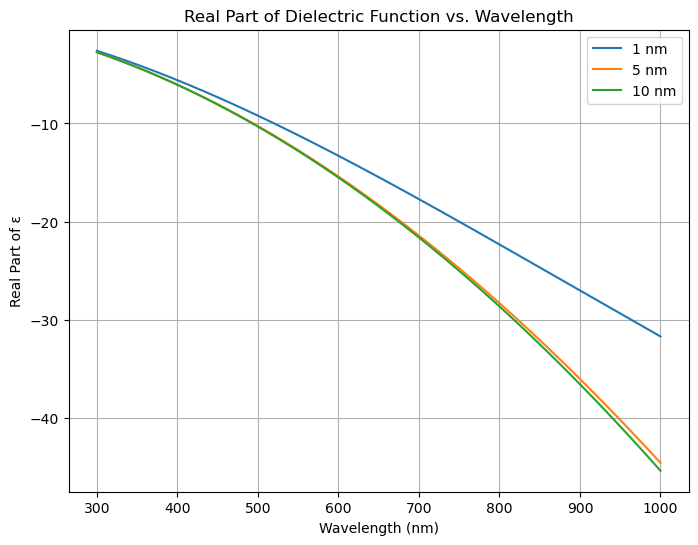

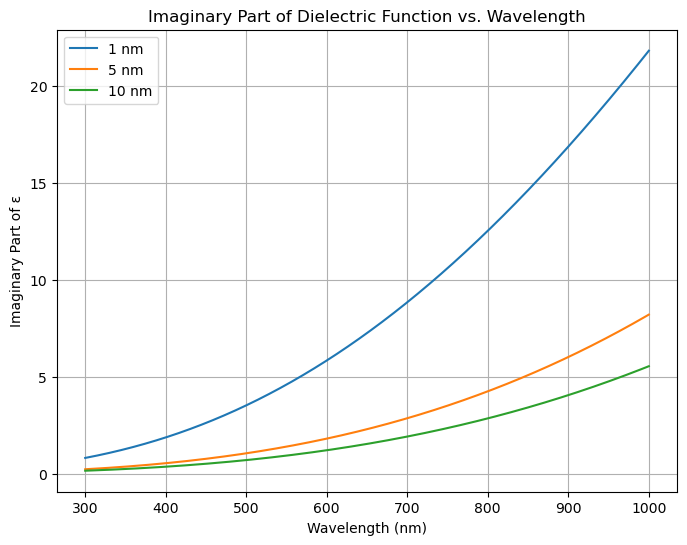

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
c = 3e8                         # speed of light, m/s
epsilon_inf = 1.53              # high-frequency dielectric constant for Au
omega_p = 13e15                 # plasma frequency, Hz
gamma_bulk = 1.1e14             # bulk damping constant, Hz
v_f = 1.41e6                    # Fermi velocity, m/s (converted from 14.1e14 nm/s)
C = 0.8                         # scattering constant

# Nanoparticle radii (in nm) and conversion to m
radii_nm = [1, 5, 10]
radii = [r * 1e-9 for r in radii_nm]

# Define wavelength range (300 nm to 1000 nm) and convert to m
wavelength_nm = np.linspace(300, 1000, 1000)
wavelength = wavelength_nm * 1e-9

# Convert wavelength to angular frequency: ω = 2πc/λ
omega = 2 * np.pi * c / wavelength

def drude_dielectric(omega, omega_p, gamma, epsilon_inf):
    """
    Computes the complex dielectric function using the Drude model:
      ε(ω) = ε_inf - ω_p^2/(ω^2 + iωγ)
    """
    return epsilon_inf - omega_p**2 / (omega**2 + 1j * omega * gamma)

# Compute dielectric function for nanoparticles with size-dependent damping
epsilon_np = {}
for r in radii:
    # Effective damping: bulk damping plus additional term from surface scattering
    gamma_eff = gamma_bulk + C * v_f / r
    epsilon_np[r] = drude_dielectric(omega, omega_p, gamma_eff, epsilon_inf)

# Plot the real parts
plt.figure(figsize=(8, 6))
for r in radii:
    plt.plot(wavelength_nm, np.real(epsilon_np[r]), label=f'{int(r*1e9)} nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Real Part of ε')
plt.title('Real Part of Dielectric Function vs. Wavelength')
plt.legend()
plt.grid(True)

# Plot the imaginary parts
plt.figure(figsize=(8, 6))
for r in radii:
    plt.plot(wavelength_nm, np.imag(epsilon_np[r]), label=f'{int(r*1e9)} nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Imaginary Part of ε')
plt.title('Imaginary Part of Dielectric Function vs. Wavelength')
plt.legend()
plt.grid(True)

plt.show()


In [7]:
import numpy as np
import miepython
import os
import glob
import matplotlib.pyplot as plt

# Directory containing the dielectric function files
dielectric_dir = "output_new"
output_dir = "mie_results"
os.makedirs(output_dir, exist_ok=True)

# Nanoparticle diameters to simulate (in nm)
diameters = np.arange(10, 90, 10)  # 10 nm to 80 nm in steps of 10 nm

# Read dielectric function files
files = glob.glob(os.path.join(dielectric_dir, "Rioux_dielectric_*"))

for file in files:
    # Extract metal composition from filename
    filename = os.path.basename(file)
    composition = filename.replace("Rioux_dielectric_", "").replace(".txt", "")
    
    # Load dielectric function data
    data = np.loadtxt(file, skiprows=3)  # Skip headers
    wavelengths = data[:, 0]  # in microns
    n_values = data[:, 1]
    k_values = data[:, 2]
    
    # Compute refractive index (complex)
    m_values = n_values - 1j * k_values
    
    for d in diameters:
        radius = d / 2000  # Convert diameter to radius in microns
        x = 2 * np.pi * radius / wavelengths  # Size parameter
        cross_section_area = np.pi * radius**2
        
        # Run Mie calculations
        qext, qsca, qback, g = miepython.mie(m_values, x)
        sca_cross_section = qsca * cross_section_area
        abs_cross_section = (qext - qsca) * cross_section_area
        
        # Save results
        output_file = os.path.join(output_dir, f"mie_{composition}_{d}nm.txt")
        with open(output_file, "w") as f:
            f.write(f"Mie Scattering and Absorption for {composition} {d}nm Sphere\n")
            f.write("Wavelength(nm)  Scattering_Cross(µm²)  Absorption_Cross(µm²)\n")
            for w, sca, abs_ in zip(wavelengths * 1000, sca_cross_section, abs_cross_section):
                f.write(f"{w:.2f} {sca:.6f} {abs_:.6f}\n")
        print(f"Saved: {output_file}")

                # Plot results
        plt.figure(figsize=(8, 6))
        plt.plot(wavelengths * 1000, sca_cross_section, label="Scattering Cross-section", color='blue')
        plt.plot(wavelengths * 1000, abs_cross_section, label="Absorption Cross-section", color='red')
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Cross-section (µm²)")
        plt.title(f"Mie Scattering & Absorption for {composition} {d}nm")
        plt.legend()
        plt.grid()
        
        # Save plot
        plot_file = os.path.join(output_dir, f"mie_{composition}_{d}nm.png")
        plt.savefig(plot_file)
        plt.close()
        print(f"Saved plot: {plot_file}")

Saved: mie_results\mie_0Au_100Ag_10nm.txt
Saved plot: mie_results\mie_0Au_100Ag_10nm.png
Saved: mie_results\mie_0Au_100Ag_20nm.txt
Saved plot: mie_results\mie_0Au_100Ag_20nm.png
Saved: mie_results\mie_0Au_100Ag_30nm.txt
Saved plot: mie_results\mie_0Au_100Ag_30nm.png
Saved: mie_results\mie_0Au_100Ag_40nm.txt
Saved plot: mie_results\mie_0Au_100Ag_40nm.png
Saved: mie_results\mie_0Au_100Ag_50nm.txt
Saved plot: mie_results\mie_0Au_100Ag_50nm.png
Saved: mie_results\mie_0Au_100Ag_60nm.txt
Saved plot: mie_results\mie_0Au_100Ag_60nm.png
Saved: mie_results\mie_0Au_100Ag_70nm.txt
Saved plot: mie_results\mie_0Au_100Ag_70nm.png
Saved: mie_results\mie_0Au_100Ag_80nm.txt
Saved plot: mie_results\mie_0Au_100Ag_80nm.png
Saved: mie_results\mie_100Au_0Ag_10nm.txt
Saved plot: mie_results\mie_100Au_0Ag_10nm.png
Saved: mie_results\mie_100Au_0Ag_20nm.txt
Saved plot: mie_results\mie_100Au_0Ag_20nm.png
Saved: mie_results\mie_100Au_0Ag_30nm.txt
Saved plot: mie_results\mie_100Au_0Ag_30nm.png
Saved: mie_results\mi